# Laboratory Session 2 -- Assignment

To be delivered until 2022-12-16 23:59:59.

## Section 1 -- Linear Regression

**1.** Consider a dataset with 100 observations, containing a single predictor and a quantitative response. Two different models are fitted to the data, a linear regression ($m_1: Y = \beta_0 + \beta_1 X + \epsilon$) and a cubic regression ($m_2: Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$).

**1.a)** Suppose that the actual relation between X and Y is linear. Can the **training** residual sum of squares (RSS) of the linear model be expected to be smaller, larger or equal to the one from the cubic model? Or is there no information to tell? Justify your answer.

Since the relationship is actually linear and a line (linear) would then fit better/perfect while a cubic polynomial would not. The training and test RSS can be expected to be 0 for the linear regression in this instance, while the cubic regression would produce an error until it achieves beta 2 and 3 = 0. Since we want less complexity, linear model is sufficient/better. 

**1.b)** Answer question 1.a) considering the test RSS rather than the training RSS.

With a 100 observations, the linear regression will most likely accurately predict the response given the single predictor. Even when the test RSS is computed, it should be close to 0 (depending on whether the relationship is completely linear or not). 

For the cubic regression however, this might not be the instance as the regression will try to make a cubic approximation to the 100 data points that all are on a line. With enough training it would hit all the 100 observations, but when being tested with the different dataset containing data points not before seen, it may miss and fall suspect to overfitting.

**1.c)** Suppose that the actual relationship between X and Y is not linear, but it is not known how far it is from being linear. What is it expected of the the **training** RSS for the linear compared with the cubic models? Or is there not enough information? Justify your answer.

The expected training RSS would most likely be lower for the cubic regression as this has more degrees of freedom to fit the regression better to the data points we have in the training set. This would however be to overfit the model (most likely) if the relationship in reality is closer to being linear.

**1.d)** Answer question 1.c) considering the test RSS rather than the training RSS.

For this instance we don't have enough information. We would have to try it and see which scores the better. Adding complexity without gain is pointless and should be avoided so if they score close to the same then we'd go for the linear regression.

**2.a)** Load the dataset "wine.csv". Do not change the dataset file.

In [155]:
import pandas as pd

# Error? In google collab you have to press the folder on the side menu to the
# left, and then the upload file (first out of four icons) and select the data file.
df_original = pd.read_csv('winequality.csv', sep=';')

df_original.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,red,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,red,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,red,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red,5


**2.b)** Encode the feature "type".

In [156]:
# One hot encoding of the categorical variables using get_dummies function

# Find indice of the type column
# cat_indices = [i for i, x in enumerate(df_original.dtypes == 'object') if x]  

df_encoded = pd.get_dummies(df_original, columns=['type'])
df_encoded

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0,1


**2.c)** Perform a simple linear regression considering *quality* as the response and *pH* as the predictor. Given the results, comment on the following statements:

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

response_y = df_original["quality"].values.reshape(-1,1)
predictor_X = df_original["pH"].values.reshape(-1,1)

regr = LinearRegression()
regr.fit(predictor_X, response_y)

## Print the interception and coefficient
print('quality = {:.4f} + {:.4f} * pH'.format(regr.intercept_[0], regr.coef_[0][0]))

# do we have to visualize the linear regression?
pH_predicted = regr.predict(predictor_X)
r2_value = r2_score(response_y, pH_predicted)
print('R^2: {:.4f}'.format(r2_value))

quality = 5.4774 + 0.1059 * pH
R^2: 0.0004


    i) Are the predictor and response statistically related?

R-squared does not give information of causal relationship, only the correlation. Our R-squared is really low, which means very little of the variation in the response can be attributed to variation in the predictor. This means they are independent from each other and thus not statistically related. However, this does not necessarily mean we should drop the predictor.

Other comment on what R-squared is:
R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit). 
(source: https://corporatefinanceinstitute.com/resources/data-science/r-squared/).

    ii) How strong is the relationship between predictor and response? (*Hint: comment on the R^2 score of the model*)

Very weak! 0.0004 means that when the predictor increases, only 0.04% of the increase will translate to the response 


    iii) Is the relationship between the predictor and response positive or negative?

It is positive. When the predictor increases, the response increases as well. But almost nothing.

    iv) What is the predicted value of quality when the pH is 9?

In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# The last operation we did on regr was:
# regr.fit(predictor_X, response_y)
# The pH for when pH is 9 is thus:
qual_calculated = regr.intercept_[0] + regr.coef_[0][0]*9
print('quality = {:.4f} + {:.4f} * (pH = 9) = {:.4f}'.format(regr.intercept_[0], 
                                                       regr.coef_[0][0], 
                                                       qual_calculated))


quality = 5.4774 + 0.1059 * (pH = 9) = 6.4309


**2.d)** Plot a scatter plot of the response and predictor, along with the regression line.

0       3.51
1       3.20
2       3.26
3       3.16
4       3.51
        ... 
6492    3.27
6493    3.15
6494    2.99
6495    3.34
6496    3.26
Name: pH, Length: 6497, dtype: float64


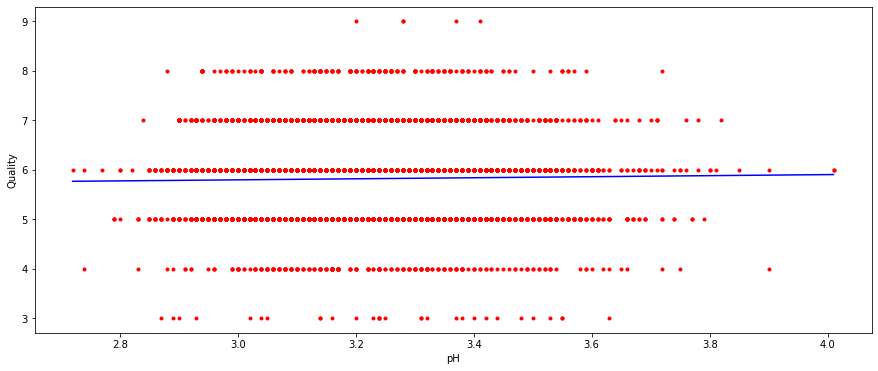

In [159]:
import matplotlib.pyplot as plt
import numpy as np

limits_pH = np.array([min(predictor_X), max(predictor_X)])
quality_vals = regr.intercept_[0] + regr.coef_[0][0]*limits_pH

print(df_original['pH'])
plt.rcParams['figure.figsize'] = [15, 6]
plt.plot(df_original['pH'], df_original['quality'], '.r')
plt.plot(limits_pH, quality_vals, 'b-')
plt.xlabel("pH")
plt.ylabel("Quality")
plt.show()

## Section 2 -- Classification

**3)** Suppose that a dataset is divided into two equally-sized training and test sets, and then try out two different classification procedures:

* The first is the logistic regression, obtaining an error rate of 20% on the training data and 30% on the test data.
* The second is a 1-nearest neighbors, with an average error rate (averaged over test and training datasets) of 18%.

Based on these results, which method is preferred for classifying new observations? Why?

Since we only know the averaged error rate for the kNN, we do not know what the test error is as we know for the logistic regression. Since test error is what we use to measure the actual error rate, it is far more important to have a test error rate as low as possible. Naturally, it doesn't really make sense that test error would be lower than the training error, so in the case of 18% average we're most likely looking at a test error higher than 20%, and most likely closer to 30%. Due to this fact, and the fact that the kNN may also be overfitted without us knowing (possibly reaching up to 35-36% error rate for test data) , it will probably be better to go with a model where we know the certainty of our result, and the solution that is fastest, which is the LR. Furthermore, the LR can also output confidence levels about it's predictions, which the kNN can not.

**4.a)** Create a new column, "quality7", that contains a 1 if quality contains a value equal or above 7, and a 0 if quality contains a value below 7. Drop the original column "quality".

In [160]:
quality_7 = (df_encoded['quality'] > 6).astype(int)
df_7 = df_encoded.drop(columns = 'quality')
df_7['quality_7'] = quality_7

**4.b)** Do a correlation matrix plot between all the columns to evaluate which features are linearly correlated. Consider a statistical significance of 0.1%. Describe your findings, with a focus on evaluating which features are most related with "quality7".

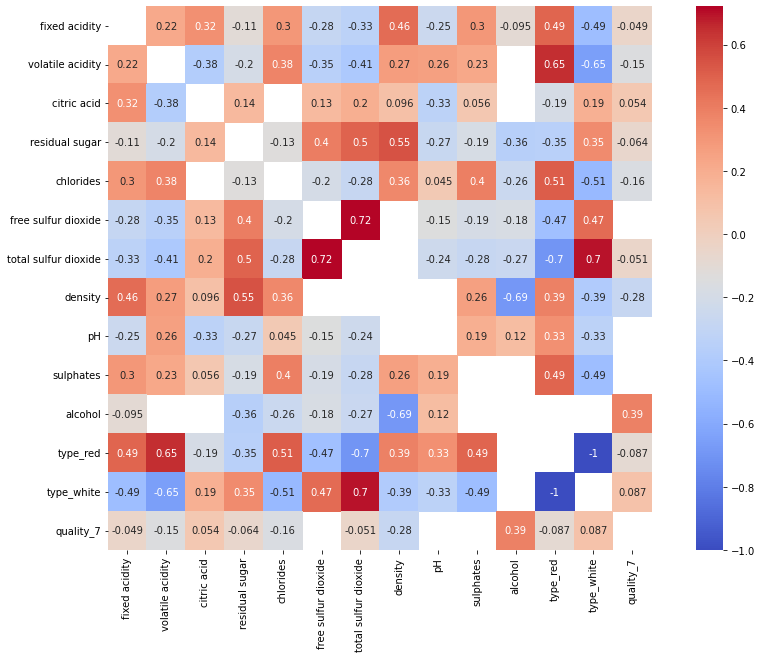

In [161]:
from scipy.stats import pearsonr
import seaborn as sns

## Calculate the pairwise correaltions
df_corrs = df_7.corr()

## Calculate the p-values between the columns of the dataframe
pvals = df_7.corr(method=lambda x,y: pearsonr(x,y)[1])

## Create a mask, specifying the statistical significance
ptg = 0.1/100
mask = pvals > ptg

## Plot the graph
plt.subplots(figsize=(16, 10))
sns.heatmap(df_corrs, mask=mask, square=True, annot=True, cmap="coolwarm")

ANSWER: According to the heatmap plot, quality is mostly correlated with alcohol. Volatile acidity, chlorides and density have a slight negative correlation with the quality. The remaining predictors are rather weakly correlated with quality.

**4.c)** Create the inputs as all the predictors and outputs as the "quality7" feature. Split the data into test and training datasets. Consider a test dataset comprised of 30% of the whole dataset.

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from random import sample
from sklearn import metrics
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Establish the idxs of each test and train datasets
test_size = 0.3      # Ratio of test dataset
seed = 100           # Random seed
random.seed(seed)    # Apply random seed
idxs_test = sample(range(df_7.shape[0]), int(test_size * df_7.shape[0]))  # Sample idxs for test datasets
idxs_train = [i for i in range(df_7.shape[0]) if i not in idxs_test]                 # Obtain the remaining idxs as training

X = df_7.drop(columns=['quality_7']).values
y = df_7['quality_7'].values.reshape(-1, 1)

# Divide the input vectors in test and train datasets, using the idxs obtained
X_train = X[idxs_train,:]
X_test = X[idxs_test,:]

# Do the same for the output vector
y_train = y[idxs_train,:].ravel()
y_test = y[idxs_test,:]

**4.d)** Perform LDA on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

In [163]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

## Create the model and fit the data to it
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

## Predict the classification and print the confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('Test error rate: {:.2f}%'.format(100-accuracy_score(y_pred,y_test)*100))

cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 1]
y_LDA_pred = model.predict_proba(X_test)[:,cols_to_store]
y_LDA_true = (y_test.copy() == 1).copy()

Test error rate: 18.21%


**4.e)** Perform QDA on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

In [164]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

## Create the model and fit the data to it
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)

## Predict the classification and print the confusion matrix
y_pred = model.predict(X_test)
#cm = confusion_matrix(y_test, y_pred)

print('Test error rate: {:.2f}%'.format(100-accuracy_score(y_pred,y_test)*100))

cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 1]
y_QDA_pred = model.predict_proba(X_test)[:,cols_to_store]
y_QDA_true = (y_test.copy() == 1).copy()

Test error rate: 52.49%


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


**4.f)** Perform logistic regression on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

In [165]:
from sklearn.linear_model import LogisticRegression

## Create the model and fit the data to it
model = LogisticRegression()
model.fit(X_train, y_train)

## Predict the classification and print the confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('Test error rate: {:.2f}%'.format(100-accuracy_score(y_pred,y_test)*100))

cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 1]
y_logistic_pred = model.predict_proba(X_test)[:,cols_to_store]
y_logistic_true = (y_test.copy() == 1).copy()

Test error rate: 18.21%


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**4.g)** Perform naive Bayes on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

In [166]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))
print('Test error rate: {:.2f}%'.format(100-accuracy_score(y_pred,y_test)*100))

cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 1]
y_GNB_pred = model.predict_proba(X_test)[:,cols_to_store]
y_GNB_true = (y_test.copy() == 1).copy()


Success Rate: 69.83%
Test error rate: 30.17%


**4.h)** Perform KNN on the training data, with several values of K, in order to predict "quality7" using the remaining variables. What test errors are obtained? Which value of K seems to perform the best on this data set?

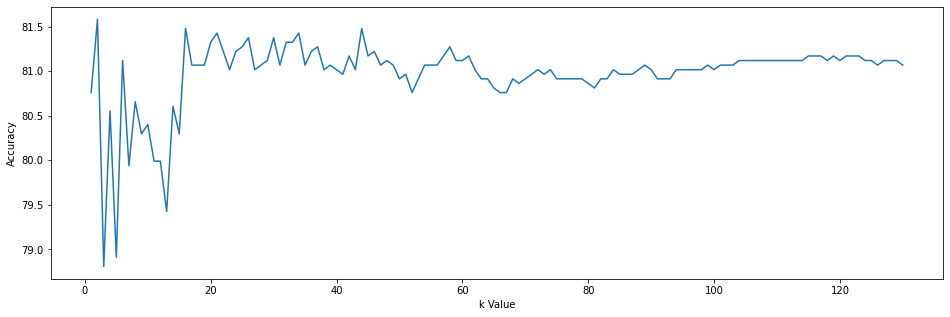


                             Actual
                   quality >=7 |  quality<7
 Predicted quality >=7:  1484  |  263
 Predicted quality < 7:  96  |  106
Error Rate: 18.42%
Achieved with 2 neighbors.


In [167]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


def KNN_fit(X_train, X_test, y_train, y_test, n_neighbors, verbosity=0):
    
    ## Create the model and fit the data to it
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)

    ## Predict the classification and print the confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy_val = accuracy_score(y_pred, y_test)*100
    

    if verbosity == 1:
        print ('\n' + 'Actual'.rjust(35))
        print ('{} |  {}'.format('quality >=7'.rjust(30),'quality<7'))
        print ('{}:  {}  |  {}'.format('Predicted quality >=7'.rjust(22), cm[0,0], cm[1,0]))
        print ('{}:  {}  |  {}'.format('Predicted quality < 7'.rjust(22), cm[0,1], cm[1,1]))
        print('Error Rate: {:.2f}%'.format((100-accuracy_val)))
        print('Achieved with {} neighbors.'.format(n_neighbors))
       
    return model, accuracy_val

## Initialize a list to store the accuracies
accuracies = []
knn_limit = 130 
for i in range(1, knn_limit+1):
    _, accuracy_val = KNN_fit(X_train, X_test, y_train, y_test, n_neighbors=i, verbosity=0)
    accuracies.append(accuracy_val)

# Find optimal K-value:
k_highest_accuracy = np.argmax(accuracies)+1 # Since list starts at index 0.

## Plot the results
plt.subplots(figsize=(16, 5))
plt.plot([i+1 for i in range(knn_limit)], accuracies)
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.show()

## Store the necessary variables
model, accuracy_val = KNN_fit(X_train, X_test, y_train, y_test, n_neighbors=k_highest_accuracy, verbosity=1)
cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 1]
y_KNN_pred = model.predict_proba(X_test)[:,cols_to_store]
y_KNN_true = (y_test.copy() == 1).copy()


According to: https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb,
The optimal K value usually found is the square root of N, where N is the total number of samples (for us n=6500, sqrt(n)=80), and a low k-value leads to "unstable decision boundaries"... Thus we are uncertain that k = 2 is the optimal k-value even though it is the one with the best accuracy.

**4.i)** Calculate the area under curve (AUC) for the LDA, QDA, logistic regression, naive Bayes and for the best value of K for the KNN method. Compare the results.

In [168]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 1] ## fit to this verision

#y_logistic_pred = model.predict_proba(X_test)[:,cols_to_store]
#y_logistic_true = y_test.copy()

# Calculate ROC curves
lr_fpr, lr_tpr, _ = roc_curve(y_logistic_true, y_logistic_pred)
lr_fpr1, lr_tpr1, _ = roc_curve(y_LDA_true, y_LDA_pred)
lr_fpr2, lr_tpr2, _ = roc_curve(y_QDA_true, y_QDA_pred)
lr_fpr3, lr_tpr3, _ = roc_curve(y_GNB_true, y_GNB_pred)
lr_fpr4, lr_tpr4, _ = roc_curve(y_KNN_true, y_KNN_pred)


# Print scores of Area under curve (AUC)
print('AUC'.rjust(25))
print('{}: {:.3f}'.format('Logistic Regression'.rjust(19), roc_auc_score(y_logistic_true, y_logistic_pred)))
print('{}: {:.3f}'.format('LDA'.rjust(19), roc_auc_score(y_LDA_true, y_LDA_pred)))
print('{}: {:.3f}'.format('QDA'.rjust(19), roc_auc_score(y_QDA_true, y_QDA_pred)))
print('{}: {:.3f}'.format('Naive Bayes'.rjust(19), roc_auc_score(y_GNB_true, y_GNB_pred)))
print('{}: {:.3f}'.format('KNN'.rjust(19), roc_auc_score(y_KNN_true, y_KNN_pred)))



                      AUC
Logistic Regression: 0.781
                LDA: 0.806
                QDA: 0.519
        Naive Bayes: 0.724
                KNN: 0.726


**4.j)** Plot the ROC curves for the 5 methods. Compare the results.

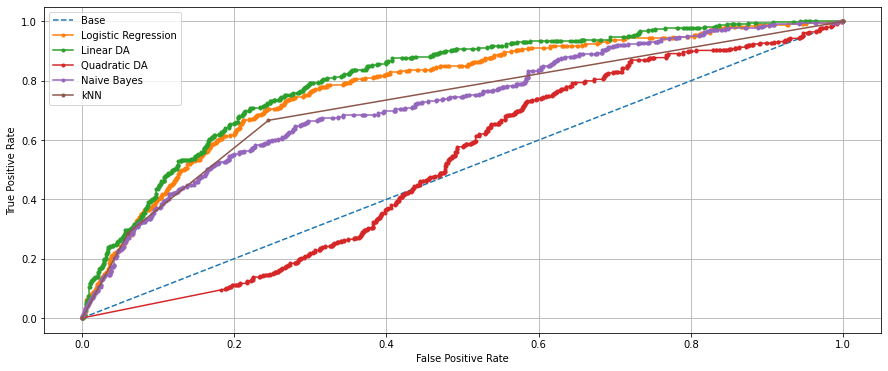

In [169]:

# Plot the ROC curve for the model
plt.subplots(figsize=(15, 6))
plt.plot([0,1], [0,1], linestyle='--', label = 'Base')
plt.plot(lr_fpr, lr_tpr, marker='.', label = 'Logistic Regression')
plt.plot(lr_fpr1, lr_tpr1, marker='.', label = 'Linear DA')
plt.plot(lr_fpr2, lr_tpr2, marker='.', label = 'Quadratic DA')
plt.plot(lr_fpr3, lr_tpr3, marker='.', label = 'Naive Bayes')
plt.plot(lr_fpr4, lr_tpr4, marker='.', label = 'kNN')

# Axis Labels
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

As we can see from question 4.i the method which generates the highest AUC is the linear discriminant analysis. However, logistic regression is not far from being as good. 

We can also see that QDA seems to be completely useless for this task, not outperforming the base line until a false positive rate at close to 0.5, which is usually quite unacceptable. 

As AOC under 1 is the best, we can rank the performance in order of which graph has a higher AOC than the others (as can be seen visually in the ROC plot). The ordering would be as following: LDA, LR, Naive Bayes, kNN, QDA.

## Section 3 -- Bootstrap and k-Fold

**5.a)** Explain how the leave-one-out cross validation (LOOCV) is implemented.

1.   Split the dataset into a training set and a testing set. In LOOCV, the testing set will consist of only one data point, and the training set will consist of the remaining data points.
2.   Train the model on the training set.
3. Test the model on the testing set and record the performance metrics (e.g., accuracy, precision, recall, etc.).
4. Repeat steps 2 and 3 for each data point in the dataset. This will involve training and testing the model n times, where n is the number of data points in the dataset.
5. Calculate the average performance of the model across all n training and testing iterations. This will provide an estimate of the model's performance on unseen data.


**5.b)** What are the advantages and disadvantages of k-Fold cross-validation relative to:

1. Validation set approach.
2. Leave One Out Cross-Validation (LOOCV)

1. 
  The validation set approach reduces the number of observations used to train the model as a lot of the observations are used to validate the data. Also, the validation estimate of the test error can be highly variable depending on which observations are included in the training set and which observations are included in the validation set. The k-Fold CV approach has advantage of having the possibility to be used to select the best model, while a huge drawback is the increased computation time.

2. k-fold cross-validation is more computationally efficient and can provide more accurate estimates of model performance than leave-one-out cross-validation. However, it is less effective for small datasets and can be sensitive to the choice of k.

## Section 4 -- Other Questions

**6)** In your group's option, what are the advantages and disadvantages of using a virtual environment when programming in Python?

Advantages: 
- Package isolation, which we as developers don't really notice until we're in deep trouble of having conflicting dependencies and issues with having developed for different environments.
- Easier package management; knowing which packages are in an environment makes it possible to encapsulate an application with only the needed packages for it to work. This, also, is not something we notice in these assignments.

Disadvantages:
- More overhead. For us it took more time than what it would has saved us. Setting up a virtual environment and installing the packages into the environment has been more work than what the advantages has been.

**7)** In your group's opinion, in what circumstances is it better to use Jupyter Notebooks and when is it better to use Google Colab notebooks? Give some specific examples.

In our opinion they are very similar, and little difference is noticed thus far. However, having read the Google Colab Notebooks (GCN) intro we know that while Jupyter Notebooks (JN) runs locally, GCN runs on cloud computing power, which makes it a far superior tool in the SPECIFIC EXAMPLE of having to run computationally heavy operations such as training complex models (which we are doing in this course). 

We have no experience collaborating in JN, but we believe it to be much harder. Sharing files in google drive is more familiar, and simply creating a link to the file and all pasting their updates into the same "main" file while we all made our "branch-documents" to not overwrite each other proved a useful way of working on this assigment; thus, another specific example can be that collaboration is easier. 

When needing to do operations with low latency, JN would be better as it runs locally. 

The most important argument is the fact that the cloud computing saves our computers from running hot, which we are very grateful of.

**8)** Enter your GitHub repository webpage.

https://github.com/ferning1/AA_Project_Group13